In [1]:
import pandas as pd 
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import tensorflow as tf
import itertools

import numpy as np
from scipy import linalg
import matplotlib as mpl

import scipy.stats 
import pickle 
from sklearn import mixture

csvfile = "crashed1D_train.csv"  #file name 
avffile="crashed_10_avf.csv"

In [2]:
data_test= pd.read_csv(csvfile)
data_test.head()
data_avf=pd.read_csv(avffile)

In [11]:
bic_store=[]
X=data_test["Kick_Speed"].iloc[370:382]
#Y=list(data_avf["Kick_Speed"])
#t_data=X+Y
#print('Total Data:',t_data)
X=np.array(X).reshape(-1,1)
print("X is:",X)

X is: [[60.23]
 [56.79]
 [63.86]
 [50.77]
 [70.01]
 [45.81]
 [50.78]
 [49.54]
 [48.23]
 [55.48]
 [52.69]
 [56.91]]


[84.68810744026779, 89.9106241119778, 80.62216381647649, 72.34187503982709, 62.57460738692352, 55.29991651024774, 49.10025355851345, 37.24389450608476, 21.429115088603815, 9.239921420765867, 1.0898517663495255, 2.8778904388328073, 84.68810744026779, 89.9106241119778, 80.62216381647649, 72.34187503982709, 62.57460738692352]


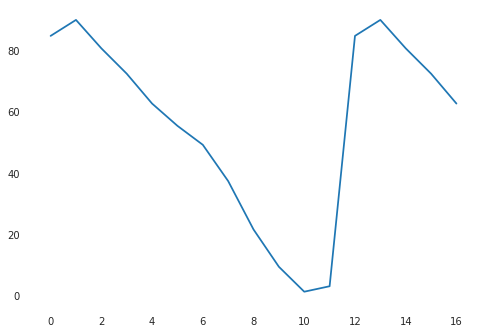

In [13]:
for i in range(5):
 gmm = mixture.GaussianMixture(n_components=i+1, covariance_type='full',n_init=200).fit(X)
 bic=gmm.bic(X)
 bic_store.append(bic)
print(bic_store)

plt.plot(bic_store)

In [37]:
i=1
gmm = mixture.GaussianMixture(n_components=i+1, covariance_type='full',n_init=200).fit(X)
bic=gmm.bic(X)
print(bic)

89.9106241119778


In [38]:
with open('gmm_1D', 'wb') as f:
    pickle.dump(gmm, f)

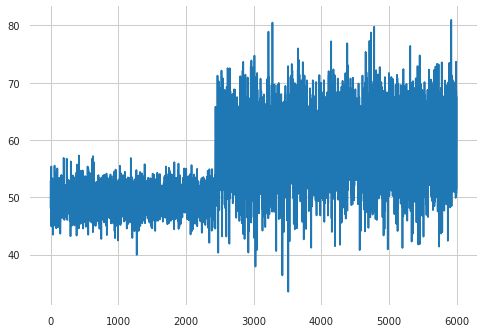

In [40]:

with open('gmm_1D', 'rb') as f:
    model = pickle.load(f)
for i in range(1):
  sample = model.sample(6000)
  #print(sample)
fig, ax = plt.subplots()
ax.plot(sample[0])
ax.grid(True)
plt.show()

In [41]:
param=gmm.means_;covar=gmm.covariances_
print("Means are :",param)
print("Variances are :",covar)

Means are : [[49.56501101]
 [58.81872138]]
Variances are : [[[ 5.22731055]]

 [[37.23121387]]]


[[60.23]
 [56.79]
 [63.86]
 [50.77]
 [70.01]
 [45.81]
 [50.78]
 [49.54]
 [48.23]
 [55.48]
 [52.69]
 [56.91]]
Length of array : 12
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


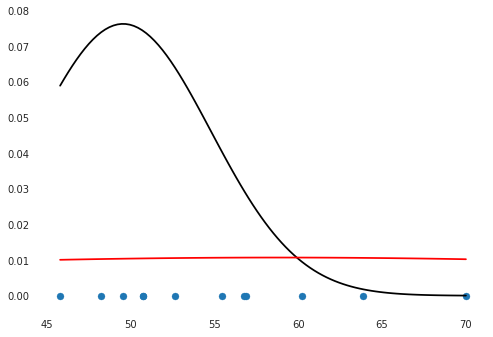

In [42]:
fig, ax = plt.subplots()
ar=X
print(ar)
#ax.scatter(data_test[["Kick_Speed"]], c = 'red',label='fail')
val = 0. # this is the value where you want the data to appear on the y-axis.
print('Length of array :',len(ar))
#plt.plot( ar,"ro")
#plt.hist(ar, bins = 10)
#plt.show()
y_loc=np.zeros_like(ar)
print(y_loc)
val = 0. # this is the value where you want the data to appear on the y-axis.
plt.scatter(ar,y_loc)



#fig, ax = plt.subplots()
x_min = min(ar)
x_max =max(ar)


mean1 =param[0][0] ;std1 = covar[0][0]
mean2 =param[1][0] ;std2 = covar[1][0]
#mean3 =param[2][0] ;std3 = covar[2][0]
#mean4 =param[3][0] ;std4 = covar[3][0]
x = np.linspace(x_min, x_max, 100)

y1 = scipy.stats.norm.pdf(x,mean1,std1)
y2 = scipy.stats.norm.pdf(x,mean2,std2)
#y3 = scipy.stats.norm.pdf(x,mean3,std3)
#y4 = scipy.stats.norm.pdf(x,mean4,std4)
plt.plot(x,y1, color='black')
plt.plot(x,y2, color='red')
#plt.plot(x,y3, color='green')
#plt.plot(x,y4, color='blue')
plt.show()

[[[1.29551805e+01]]

 [[4.25709907e+00]]

 [[1.00000000e-06]]]


[91.53893227565102, 95.56560715661729, 86.48604516984473, 78.46976374809758, 68.94221853958598, 63.08651311184931, 53.69396472144301, 41.744899544904165, 37.57749666644898, 25.628431121631657, 14.329298223216071, 6.41935669182034, 8.447523487324219, 86.48604516984473, 14.329298223216071, 8.447523487324219]


60.22999999999986
[[[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]]


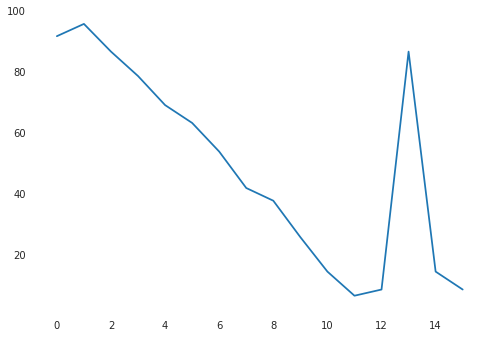

[60.23, 56.79, 63.86, 50.77, 70.01, 45.81, 50.78, 49.54, 48.23, 55.48, 52.69, 56.91, 47.95]
Length of array : 13
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


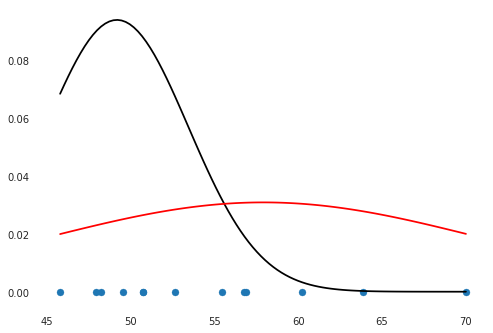

In [231]:
sample = gmm.sample(1)
print(sample)

(array([[49.54105828]]), array([9]))


In [232]:
with open('gmm_model', 'wb') as f:
    pickle.dump(model, f)

NameError: name 'pickle' is not defined